In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# ! 表示在 Google Colab 或 Jupyter Notebook 中使用 shell 命令的语法
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.9 MB/s eta 0:00:00


In [4]:
# fastbook 是 fast.ai 深度学习课程的配套库，它提供了一些实用函数和工具，用于简化 fast.ai 库的使用
from fastbook import *
# fastai 库的一个子模块，它提供了一些用于创建交互式图像分类界面的小部件（widgets）
from fastai.vision.widgets import *

In [5]:
# 课程中使用的bing，但是bing已经改版，此处使用DuckDuckGo(https://duckduckgo.com/)代替bing
# 具体可查看 https://course20.fast.ai/images
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

### search_images_ddg源码解析

```python
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     # 初始化 URL 和参数
     url        = 'https://duckduckgo.com/' #设置 DuckDuckGo 的基本 URL。
     params     = {'q':key} # 设置搜索参数，q 表示查询关键字。
     res        = requests.post(url,data=params) # 使用 requests.post 发送 POST 请求到 DuckDuckGo 搜索页面，获取初始搜索结果。

     # 解析 vqd 参数
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text) # 使用正则表达式从搜索结果的 HTML 中提取 vqd 参数，该参数是后续 API 请求所需的令牌

     # 如果无法提取 vqd 参数，则打印错误消息并返回。
     if not searchObj: print('Token Parsing Failed !'); return

     # 设置 DuckDuckGo 图片搜索 API 的 URL
     requestUrl = url + 'i.js'
     # 设置请求头部，模拟浏览器发送请求。
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     # 设置 API 请求参数，包括语言、输出格式、查询关键字、vqd 令牌等
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     
     urls       = []
     # 循环请求 API 并提取图片 URL：
     while True:
         try:
             # 发送 GET 请求到 API，获取搜索结果。
             res  = requests.get(requestUrl,headers=headers,params=params)
             # 解析 JSON 格式的搜索结果
             data = json.loads(res.text)
             # 遍历搜索结果中的每个图片对象
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls)) # 如果达到最大图片数量，则返回去重后的 URL 列表
             if 'next' not in data: return L(set(urls)) # 如果没有更多结果，则返回去重后的 URL 列表。
             requestUrl = url + data['next']
         except:
             # 忽略所有异常
             pass
```

### 方法L说明
```
L(set(urls))
```
使用 fastbook 提供的 L 函数将去重后的 URL 列表转换为 fastai 的 L 对象。

### 完整源码

请点击[此处](https://github.com/fastai/fastbook/blob/master/utils.py)查看

In [6]:
# 使用 DuckDuckGo 图片搜索引擎搜索灰熊的图片
imgs = search_images_ddg("grizzly bear")
len(imgs)

200

In [7]:
# 下载图片
dest = 'images/grizzly.jpg'
download_url(imgs[0], dest, show_progress=False)

Path('images/grizzly.jpg')

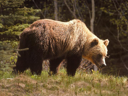

In [8]:
# 打开图片
im = Image.open(dest)
im.to_thumb(128,128)

上面的代码演示了可以通过 search_images_ddg 和 download_url下载图片，接下来跟着书中例子获取三种熊'grizzly'（灰熊）、'black'（黑熊）和 'teddy'（泰迪熊）的图片。

In [9]:
bear_types = 'grizzly','black','teddy'
# 创建了一个 Path 对象，一个名为 bears 的目录
path = Path('bears')

In [10]:
if not path.exists():
    # path 目录不存在，创建目录
    path.mkdir()
    for o in bear_types:
        # 将 path 目录和 o 字符串连接起来，创建一个新的 Path 对象。
        # o 变量分别取值为 'grizzly'、'black' 和 'teddy'
        dest = (path/o)
        # 创建 dest 变量表示的目录
        # exist_ok=True: 如果目录已经存在，则不引发错误
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [11]:
# 使用 fastai 库中的 get_image_files 函数来获取指定路径下的所有图像文件，并将结果存储在 fns 变量中
fns = get_image_files(path)
fns

(#541) [Path('bears/grizzly/939214d7-f0c0-4410-bada-82da71004c3a.jpg'),Path('bears/grizzly/19a16fa4-ca41-4090-90c0-dcd836e1833c.jpg'),Path('bears/grizzly/0af46480-050d-452c-bcb2-e5d3f048c8bb.jpg'),Path('bears/grizzly/cd10d787-8f07-4b97-bf10-10e584f66db1.jpg'),Path('bears/grizzly/988b7afa-afc5-4e1f-9b1b-1a26dfc21438.jpg'),Path('bears/grizzly/7a6cdd70-c288-4536-b573-9fe8bc6d3d38.jpeg'),Path('bears/grizzly/a592abb8-19e6-46c9-9311-0ea99ca59829.jpg'),Path('bears/grizzly/db2843ec-ef1b-4174-97ca-def0cb857e94.jpg'),Path('bears/grizzly/9f85d06c-c831-4410-b05c-d49c29ed4be1.jpg'),Path('bears/grizzly/54102bb1-df3e-4669-929c-644f834cb86b.jpg'),Path('bears/grizzly/822837aa-4adf-4fce-8b5d-bc2c3b6fab72.jpg'),Path('bears/grizzly/000b638f-1ea6-40c1-8dc9-ffecc69b0da4.jpg'),Path('bears/grizzly/3d456879-c958-442b-8f79-5f77f9293c3d.jpg'),Path('bears/grizzly/a4a86cce-a9d4-4792-a649-f04993dde422.jpg'),Path('bears/grizzly/b3d06291-7fa4-4c14-b541-f5d094b27d20.jpg'),Path('bears/grizzly/038d3af2-85d8-40f0-bf56-16

In [12]:
# 使用 verify_images 函数验证 fns 列表中的所有图像文件，将验证失败的文件路径存储在 failed 变量中
failed = verify_images(fns)
failed

(#35) [Path('bears/grizzly/d7b87bf5-cc9a-4c16-af18-e5a0819fa9ae.jpg'),Path('bears/grizzly/2b2fa12a-4c45-4432-9f10-9ff53c6aa2b8.jpg'),Path('bears/grizzly/c68b45b5-e515-4772-bb39-e543d552e5cc.jpg'),Path('bears/grizzly/2045eb6d-a9de-4f71-87bc-4012586583b9.jpg'),Path('bears/grizzly/b6ca3e33-062f-49b0-a325-e192d2920e63.jpg'),Path('bears/grizzly/788bf78b-1f35-4fa4-9089-02379e1e8314.jpg'),Path('bears/grizzly/fbd48110-f114-4ece-83f9-010e9d2410bd.JPG'),Path('bears/grizzly/ae566ee1-bb97-4a68-90e5-38e0efe60c7e.jpg'),Path('bears/grizzly/2390d1f8-4cdc-49dd-8c7e-ebba7655b980.jpg'),Path('bears/grizzly/8d2dc500-df39-4ea9-b26d-ff6b65cdc122.jpg'),Path('bears/grizzly/ce819a67-5849-442b-9af6-1b246facef42.jpg'),Path('bears/black/23b7dcc6-8194-4923-b557-2ae80fc558f2.jpg'),Path('bears/black/4e3b7472-8d73-45c5-8dd3-26af2433dac1.jpg'),Path('bears/black/e054629f-3610-46d0-be6e-0759ec5e3fe4.jpg'),Path('bears/black/be12ef0e-f55e-4c34-b0a8-dee2dd6f628b.jpg'),Path('bears/black/389fdcbb-46d0-4001-9f60-dcbaf6923455.J

In [13]:
# 删除验证失败的图片
failed.map(Path.unlink);

有了数据，接下来需要训练模型，首先使用fastai的DataBlock构建一个图像分类任务的数据处理流程。

### **认识DataBlock类**
DataBlock类的核心概念就是定义一个灵活的数据处理流程。可以被视为一种内部 DSL，它为数据处理定义了一套特定的语法和语义。

* **简化数据处理 ：** 过组合预定义或自定义的组件（如数据加载、划分、增强），自动化构建训练和验证数据集 
* **抽象复杂流程 ：** 将数据流水线分解为可配置的步骤（如 get_items 获取数据、splitter 划分数据集），降低代码冗余。

由于平时java开发没有接触到这种高度抽象的数据处理框架，需要仔细体会，可以通过类比java中的建造者模式,流式处理以及工厂模式。

---
**关键组件**

- **`blocks`**：定义输入（X）和输出（Y）的数据类型。例如：
  - `(ImageBlock, CategoryBlock)` 表示输入是图像，输出是分类标签 。
  - 常见类型包括 `ImageBlock`（图像）、`CategoryBlock`（单标签分类）、`MultiCategoryBlock`（多标签分类）等。
  - `ImageBlock`主要作用是告诉 DataBlock 如何将文件系统中的图像文件转换为模型可以接受的输入张量（tensor）
  - `CategoryBlock`主要作用是告诉 DataBlock 如何将类别标签（如目录名）转换为模型可以接受的输出张量
- **`get_items`**：获取原始数据项（如 `get_image_files` 递归读取图片路径）。
- **`splitter`**：划分训练集/验证集（如 `RandomSplitter` 随机划分）。
- **`get_y`**：从数据项中提取标签（如 `parent_label` 根据父目录名获取标签）。
- **`item_tfms`**：对单个样本的预处理（如 `Resize(128)` 调整图像尺寸）。
- **`batch_tfms`**：对批次数据的预处理（如 `Normalize` 归一化）。
---

**工作流程**

1. **数据收集**：通过 `get_items` 获取原始数据路径或对象。
2. **数据划分**：`splitter` 将数据分为训练集和验证集。
3. **标签提取**：`get_y` 从数据项中提取标签（如文件路径中的目录名）。
4. **预处理**：
   - **单样本处理**：`item_tfms` 对每个样本进行增强或标准化（如调整尺寸、转为张量）。
   - **批次处理**：`batch_tfms` 对批次数据进行高效操作（如归一化、随机翻转）。
5. **生成 `DataLoaders`**：整合上述步骤，输出可直接输入模型的批次数据。

---

**扩展性与自定义**
- **自定义 `TransformBlock`**：通过继承或组合现有块（如 `MultiCategoryBlock` 支持多标签分类）。
- **修改 `get_items`/`get_y`**：实现特殊数据加载逻辑（如从 CSV 读取标签）。
- **调试工具**：`summary()` 方法逐步展示数据流水线的处理过程，帮助定位错误（如形状不匹配）。

---

**与其他组件的关系**
- **`TransformBlock`**：封装数据转换逻辑（如 `CategoryBlock` 内部使用 `Categorize` 将标签转为数值编码）。
- **`DataLoaders`**：DataBlock 最终生成 `DataLoaders`，整合 PyTorch 的 `Dataset` 和 `DataLoader`，支持 GPU 加速和并行加载。

In [14]:
# DataBlock 定义了一个图像分类任务的数据处理流程类
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),              # 输入是图像，输出是类别标签
    get_items=get_image_files,                       # 从路径加载所有图像文件
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 20%验证集，固定随机种子
    get_y=parent_label,                              # 从父目录名提取标签
    item_tfms=Resize(128))                           # 调整图像尺寸为128x128


**执行流程**：
  1. `ImageBlock` 负责加载图像、应用图像转换（如 Resize），并将图像数据转换为 PyTorch 张量。
  2. `CategoryBlock` 负责将类别标签转换为数字编码（例如，将 "grizzly" 映射到 0，"teddy" 映射到 1），并将它们转换为 PyTorch 张量。
  3. `get_image_files` 递归获取所有图片路径。
  4. `RandomSplitter` 随机划分 80% 训练集、20% 验证集。
  5. `parent_label` 提取标签（如路径 `/data/bears/grizzly/1.jpg` → 标签 `grizzly`）。
  6. 每个图像被缩放至 128x128 像素，转为张量后输入模型。

然后创建用于训练和验证模型的数据加载器（DataLoader）

In [15]:
dls = bears.dataloaders(path)

这行代码做了以下几件事情：

1.  **加载数据：**
    * 根据`DataBlock`中`get_items`的定义，从`path`指定的路径中获取所有数据项（例如，图像文件）。
2.  **划分数据集：**
    * 根据`DataBlock`中`splitter`的定义，将数据项划分为训练集和验证集。
3.  **处理数据：**
    * 根据`DataBlock`中`get_y`的定义，获取每个数据项的标签（例如，图像的类别）。
    * 根据`DataBlock`中`item_tfms`的定义，对数据项进行预处理（例如，调整图像大小）。
4.  **创建 DataLoader：**
    * 根据划分好的训练集和验证集，以及处理后的数据和标签，创建两个`DataLoader`对象。
    * `DataLoader`的作用是批量加载数据，并将其提供给模型进行训练和验证。

因此，`dls`对象实际上包含了两个`DataLoader`：

* `dls.train`：用于训练模型。
* `dls.valid`：用于验证模型。

所以，虽然这行代码确实创建了训练集，但它也同时创建了验证集，并且将它们都封装在了`DataLoader`对象中，方便后续的训练和验证。


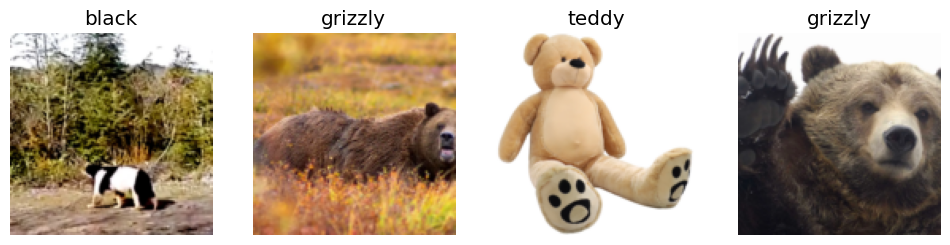

In [16]:
# 可视化验证集中的数据，展示4张图片排列1行
dls.valid.show_batch(max_n=4, nrows=1)

通过DataBlock对象中`item_tfms` 和 `batch_tfms` 处理图像

**1. `item_tfms`（逐项转换）**

* **作用：**
    * `item_tfms` 定义了应用于单个图像的转换。
    * 这些转换在图像被加载到批次之前执行。
    * 通常用于调整图像大小、裁剪图像等基本转换。
* **特点：**
    * 逐项转换，即每个图像独立进行转换。
    * 在 CPU 上执行，因为它们在批处理之前应用。
    * 通常用于确保所有图像具有相同的尺寸和格式。
* **示例：**
    * `Resize(128)`：将图像调整为 128x128 像素。
    * `RandomResizedCrop(128, min_scale=0.3)`：随机裁剪图像并调整大小。
* **应用场景：**
    * 确保所有图像具有相同的尺寸，以便可以进行批处理。
    * 对单个图像进行基本预处理。

**2. `batch_tfms`（批量转换）**

* **作用：**
    * `batch_tfms` 定义了应用于整个图像批次的转换。
    * 这些转换在图像被加载到批次之后执行。
    * 通常用于数据增强，例如随机旋转、翻转和亮度调整。
* **特点：**
    * 批量转换，即一次对整个批次的图像进行转换。
    * 可以在 GPU 上执行，从而加快训练速度。
    * 通常用于增加数据的多样性，以提高模型的泛化能力。
* **示例：**
    * `aug_transforms(mult=2)`：应用一系列随机图像变换。
* **应用场景：**
    * 数据增强，以提高模型的鲁棒性。
    * 在 GPU 上执行高效的批量图像处理。

**总结：**

* `item_tfms` 用于对单个图像进行基本预处理，例如调整大小和裁剪。
* `batch_tfms` 用于对整个图像批次进行数据增强，例如随机变换。
* 通过组合使用 `item_tfms` 和 `batch_tfms`，可以构建灵活和高效的图像处理管道。

以下是 `item_tfms` 和 `batch_tfms` 的一些关键区别：

| 特性 | `item_tfms` | `batch_tfms` |
| --- | --- | --- |
| 应用对象 | 单个图像 | 图像批次 |
| 执行时间 | 批处理之前 | 批处理之后 |
| 执行位置 | CPU | CPU 或 GPU |
| 主要用途 | 基本预处理 | 数据增强 |


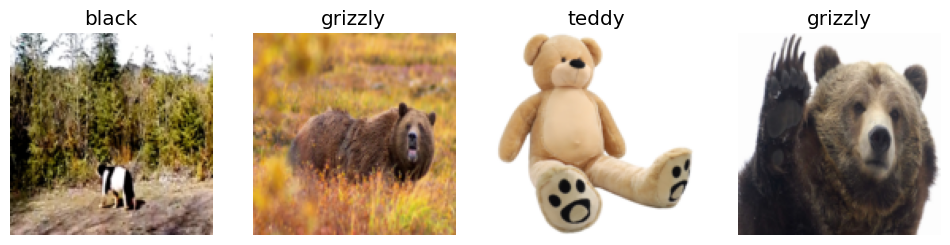

In [17]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

**修改DataBlock对象**

* 所有图像调整为 128x128 像素的大小
* ResizeMethod.Squish 方法会拉伸或压缩图像，使其适应指定的大小，而不保持原始宽高比。这可能会导致图像失真

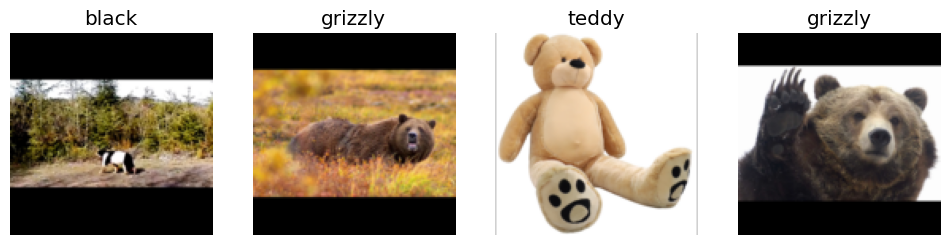

In [18]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

**修改DataBlock对象**

* 所有图像调整为 128x128 像素的大小
* ResizeMethod.Pad 方法会保持图像的原始宽高比，并在图像周围填充像素，使其适应指定的大小
* pad_mode='zeros' 参数指定填充像素的模式为零填充，即用黑色像素填充

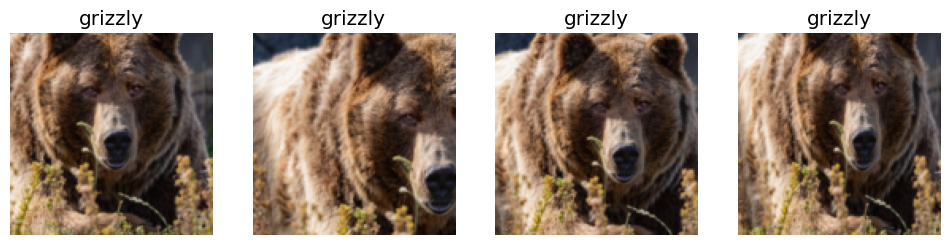

In [19]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

**修改DataBlock对象**

* 随机裁剪图像的一部分，并将其调整为 128x128 像素的大小
* min_scale=0.3 参数指定裁剪区域的最小比例。这意味着裁剪区域的面积至少是原始图像面积的 30%。
* unique=True 参数确保每个图像只显示一次。因为RandomResizedCrop是随机裁剪，所以如果不加unique=True，一个图片会显示多次不同裁剪的效果

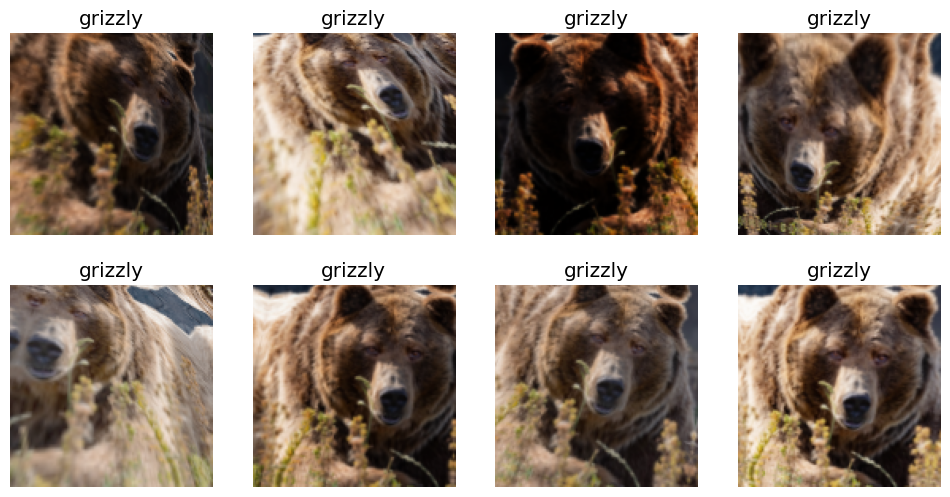

In [20]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

**修改DataBlock对象**

* aug_transforms(mult=2) 函数生成一系列数据增强转换，例如随机旋转、翻转、缩放和亮度调整
* mult=2 参数指定应用数据增强的强度。值越大，增强效果越明显。
* unique=True 参数确保每个图像只显示一次。

这些修改 `DataBlock` 对象的代码在数据集训练中具有不同的用途，并且图片修改方式的选择取决于数据集的特性和训练目标。以下是对每种修改方式的详细说明以及如何选择它们的指南：

**1. `Resize(128, ResizeMethod.Squish)`**

* **用途：**
    * 将所有图像强制调整为统一的 128x128 像素大小，不保持原始宽高比。
    * 简化了图像处理，但可能导致图像失真。
* **适用场景：**
    * 当模型的输入尺寸必须固定，并且图像的原始宽高比不重要时。
    * 例如，某些预训练模型可能需要特定尺寸的输入。
* **注意事项：**
    * 由于图像可能会失真，因此这种方法可能会降低模型的性能，尤其是在需要保留图像细节的情况下。

**2. `Resize(128, ResizeMethod.Pad, pad_mode='zeros')`**

* **用途：**
    * 将所有图像调整为 128x128 像素大小，同时保持原始宽高比。
    * 在图像周围填充黑色像素，以适应目标尺寸。
* **适用场景：**
    * 当模型的输入尺寸必须固定，并且需要保留图像的原始宽高比时。
    * 例如，当图像包含重要的细节，并且失真会影响模型的性能时。
* **注意事项：**
    * 填充的黑色像素可能会在图像周围引入不需要的背景。

**3. `RandomResizedCrop(128, min_scale=0.3)`**

* **用途：**
    * 随机裁剪图像的一部分，并将其调整为 128x128 像素大小。
    * 用于数据增强，以提高模型的泛化能力。
* **适用场景：**
    * 当数据集较小，或者模型容易过拟合时。
    * 通过随机裁剪，可以生成更多样化的训练样本，从而提高模型的鲁棒性。
* **注意事项：**
    * 裁剪可能会丢失图像的部分信息，因此 `min_scale` 参数需要仔细调整。

**4. `aug_transforms(mult=2)`**

* **用途：**
    * 应用一系列随机图像变换，例如旋转、翻转、缩放和亮度调整。
    * 用于数据增强，以进一步提高模型的泛化能力。
* **适用场景：**
    * 当数据集较小，或者模型容易过拟合时。
    * 通过随机变换，可以生成更多样化的训练样本，从而提高模型的鲁棒性。
* **注意事项：**
    * `mult` 参数需要根据数据集的特性和训练目标进行调整。

**如何选择图片修改方式：**

* **数据集特性：**
    * 如果数据集中的图像具有不同的宽高比，则 `ResizeMethod.Pad` 可能更适合。
    * 如果数据集较小，则 `RandomResizedCrop` 和 `aug_transforms` 可以提高模型的泛化能力。
* **训练目标：**
    * 如果模型的输入尺寸必须固定，并且图像的原始宽高比不重要，则 `ResizeMethod.Squish` 可能更简单。
    * 如果需要保留图像的细节，则 `ResizeMethod.Pad` 或 `RandomResizedCrop` 更适合。
    * 如果需要模型有更高的泛化能力，`aug_transforms`是必须的。
* **模型架构：**
    * 某些模型架构可能对图像的尺寸和宽高比更敏感。
    * 需要根据模型的要求选择合适的图片修改方式。

**建议：**

* 通常，建议使用 `aug_transforms` 进行数据增强，以提高模型的泛化能力。
* 如果需要保留图像的细节，则可以使用 `ResizeMethod.Pad` 或 `RandomResizedCrop`。
* `ResizeMethod.Squish` 应该谨慎使用，因为它可能会导致图像失真。
* 在选择图片修改方式时，需要进行实验，以找到最佳的配置。

**以上基于AI总结**

开始训练模型，目前没有很多数据（每种熊最多150张图片），因此为了训练我们的模型，我们将使用图像大小为 224 px 的 RandomResizedCrop，这对于图像分类来说是相当标准的，并且默认aug_transforms

In [21]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.229343,0.331220,0.099010,00:15


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.199126,0.278613,0.069307,00:15
1,0.154693,0.287042,0.089109,00:14
2,0.114443,0.228543,0.069307,00:15
3,0.090248,0.185659,0.059406,00:14


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

### 分析和理解指标：

**表格列的含义：**

* **epoch：**
    * 表示训练的周期数。一个周期表示模型在整个训练集上完成一次训练。
* **train_loss：**
    * 表示训练集上的损失值。损失值越低，表示模型在训练集上的表现越好。
* **valid_loss：**
    * 表示验证集上的损失值。验证集用于在训练过程中评估模型的性能，以防止过拟合。
* **error_rate：**
    * 表示验证集上的错误率。错误率越低，表示模型在验证集上的表现越好。
* **time：**
    * 表示完成一个周期所需的时间。

**结果分析：**

* **初始阶段（epoch 0）：**
    * 在第一个训练阶段，train_loss非常高，valid_loss也相对高，并且error_rate也很高。这说明模型在训练初期，表现非常差。因为模型刚开始训练，还没有学习到数据的规律。
* **微调阶段（epoch 0-3）：**
    * 随着训练的进行，`train_loss` 和 `valid_loss` 都在逐渐降低，`error_rate` 也在逐渐减小。这表明模型正在逐步学习数据的规律，并且在验证集上的表现也越来越好。
    * 在微调的最后阶段，valid_loss和error_rate都非常低，说明模型效果非常好。
* **整体趋势：**
    * 整体来看，模型的训练过程是成功的。损失值不断降低，错误率不断减小，这表明模型在我们的数据集上学习到了有效的特征。
    * valid_loss和train_loss的数值比较接近，说明模型没有出现过拟合，模型有很好的泛化能力。

**如何解读结果：**

* **关注 `valid_loss` 和 `error_rate`：**
    * 验证集的结果更能反映模型在真实场景中的表现。
    * 因此，我们应该重点关注 `valid_loss` 和 `error_rate` 的变化趋势。
* **观察是否过拟合：**
    * 如果 `train_loss` 远低于 `valid_loss`，则可能出现过拟合。
    * 过拟合意味着模型在训练集上表现很好，但在验证集上表现较差。
* **评估模型性能：**
    * `error_rate` 是一个直观的指标，用于评估模型的分类准确率。
    * 较低的 `error_rate` 表示模型具有较高的准确率。
* **训练时间：**
    * 训练时间可以用于评估训练效率，如果训练时间过长，可以考虑减少训练周期数，或者更换更高效的模型。

**总结：**

* 这段训练结果表明，模型在我们的数据集上取得了良好的性能。
* valid_loss和error_rate都非常低。
* 模型没有出现过拟合。
* 可以根据验证集的结果，来评估模型的泛化能力。


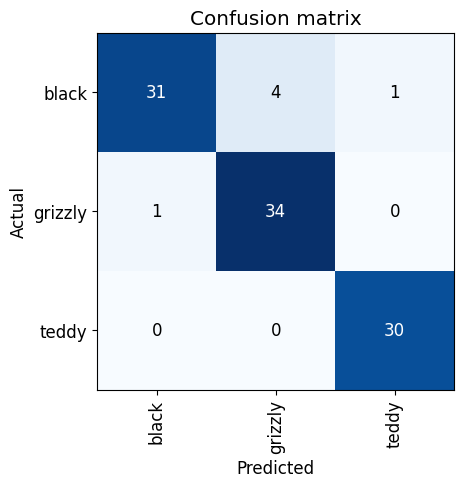

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

这段代码 `interp = ClassificationInterpretation.from_learner(learn)` 和 `interp.plot_confusion_matrix()` 是 `fastai` 库中用于分析分类模型性能的工具。

**1. `interp = ClassificationInterpretation.from_learner(learn)`**

* 这行代码创建了一个 `ClassificationInterpretation` 对象，它用于分析分类模型的预测结果。
    * `learn`：我们之前训练好的 `Learner` 对象，包含了模型和数据集的信息。
    * `ClassificationInterpretation.from_learner()`：是一个静态方法，它根据 `Learner` 对象中的模型和验证集数据，计算出一系列用于分析模型性能的指标。
    * `interp`：创建的 `ClassificationInterpretation` 对象，包含了计算出的指标和方法，用于可视化和分析模型性能。

**2. `interp.plot_confusion_matrix()`**

* 这行代码绘制了一个混淆矩阵（confusion matrix）。
    * `interp`：之前创建的 `ClassificationInterpretation` 对象。
    * `plot_confusion_matrix()`：是 `ClassificationInterpretation` 对象的一个方法，用于绘制混淆矩阵。

**混淆矩阵的作用：**

* 混淆矩阵是一个表格，用于**可视化分类模型**的预测结果。
* 它显示了模型在验证集上预测正确的样本数和预测错误的样本数。
* 混淆矩阵的行表示真实标签，列表示预测标签。
* 对角线上的元素表示模型预测正确的样本数。
* 非对角线上的元素表示模型预测错误的样本数。

**通过混淆矩阵，我们可以：**

* 了解模型在哪些类别上表现良好，在哪些类别上表现较差。
* 识别模型容易混淆的类别。
* 分析模型的错误模式，找出改进模型的方向。

**具体来说，对于你的代码，它做了以下几件事：**

1.  **分析模型预测：**
    * `ClassificationInterpretation.from_learner(learn)`：使用训练好的模型 `learn`，在验证集上进行预测，并计算真实标签和预测标签之间的关系。
2.  **可视化结果：**
    * `interp.plot_confusion_matrix()`：使用计算出的关系，生成一个混淆矩阵的图表，直观地展示模型的预测结果。

**混淆矩阵的意义：**

* 通过观察混淆矩阵，你可以知道模型在哪些类别的分类上容易出错，从而帮助你进一步优化模型。
* 例如：如果一个混淆矩阵显示模型经常将“灰熊”误分类为“黑熊”，那么你可能需要收集更多灰熊和黑熊的图片，或者调整模型的训练参数。

总而言之，这段代码的作用是生成一个混淆矩阵，帮助我们可视化和分析分类模型的预测结果，从而更好地理解和改进模型。


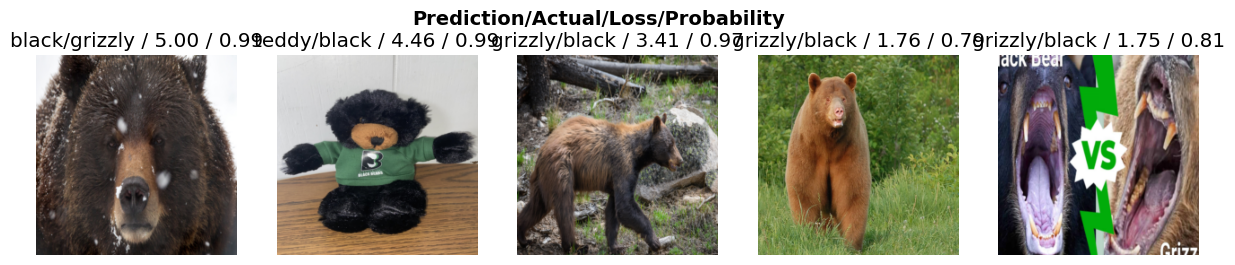

In [24]:
interp.plot_top_losses(5, nrows=1)

这段代码 `interp.plot_top_losses(5, nrows=1)` 是 `fastai` 库中用于分析分类模型错误预测的工具。

**1. `interp`**

* `interp` 是之前通过 `ClassificationInterpretation.from_learner(learn)` 创建的 `ClassificationInterpretation` 对象。
* 它包含了模型在验证集上的预测结果和真实标签，以及用于分析模型性能的指标。

**2. `plot_top_losses(5, nrows=1)`**

* `plot_top_losses()` 是 `ClassificationInterpretation` 对象的一个方法，用于显示模型预测错误最严重的样本。
* `5`：指定要显示的错误样本数量，即显示损失值最高的 5 个样本。
* `nrows=1`：指定显示的行数。在这个例子中，它表示将 5 个错误样本显示在 1 行中。

**作用：**

* 这段代码的作用是显示模型在验证集上预测错误最严重的 5 个样本。
* 通过观察这些错误样本，我们可以：
    * 了解模型容易出错的情况。
    * 识别数据中的潜在问题（例如，标签错误或图像质量问题）。
    * 分析模型的错误模式，找出改进模型的方向。

**具体来说，对于你的代码，它做了以下几件事：**

1.  **找出错误样本：**
    * `interp.plot_top_losses(5, nrows=1)`：使用 `interp` 对象中存储的预测结果和真实标签，找出模型预测错误最严重的 5 个样本。
2.  **可视化结果：**
    * `interp.plot_top_losses(5, nrows=1)`：将这 5 个错误样本以图像的形式显示出来，并显示它们的预测标签、真实标签和损失值。

**通过分析错误样本，我们可以：**

* **识别错误原因：**
    * 观察错误样本的图像，我们可以了解模型为什么会预测错误。
    * 例如，模型可能将一张模糊的图像预测错误，或者将一张光线较暗的图像预测错误。
* **改进模型：**
    * 根据错误原因，我们可以调整模型的参数、改进数据增强或收集更多的数据，以提高模型的性能。
* **清理数据集：**
    * 如果发现错误样本的标签错误，我们可以更正标签，以提高数据集的质量。

总而言之，这段代码的作用是显示模型预测错误最严重的样本，帮助我们分析模型的错误模式，从而更好地理解和改进模型。


In [31]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
